# Bosques Aleatorios

- Esta técnica hace uso del paradigma de sabiduría de las masas. Ya sea para predecir un valor o para clasificar.

### Bosques Aleatorios: ¿Ingreso Alto o Bajo?

#### Horas trabajadas, Años de estudio, Edad, Tipo de trabajo...

> 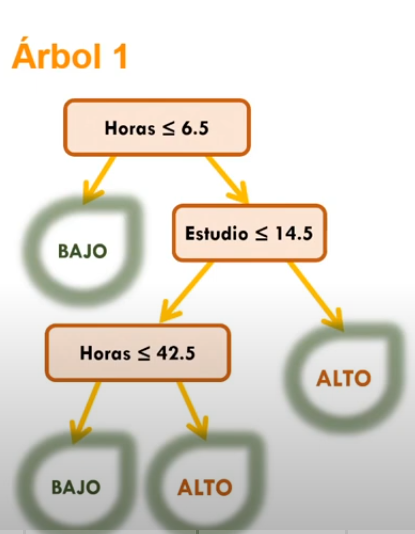
>
> 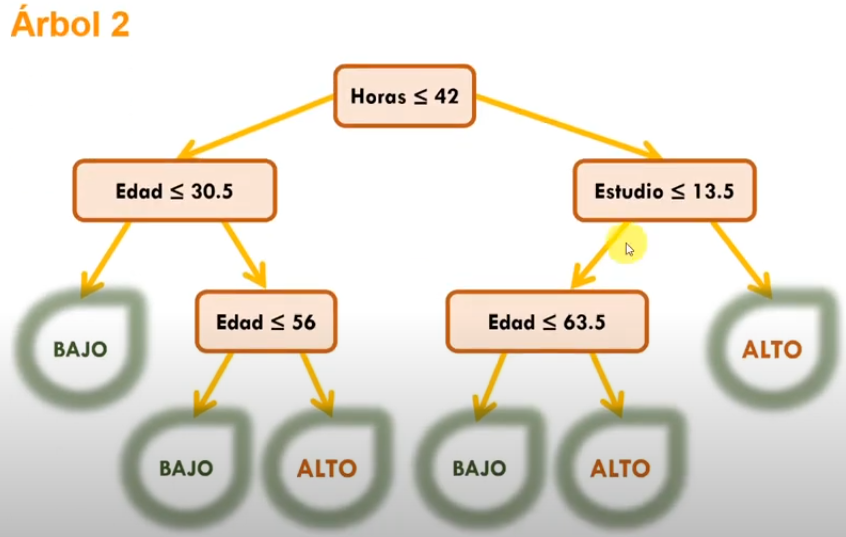
>
> 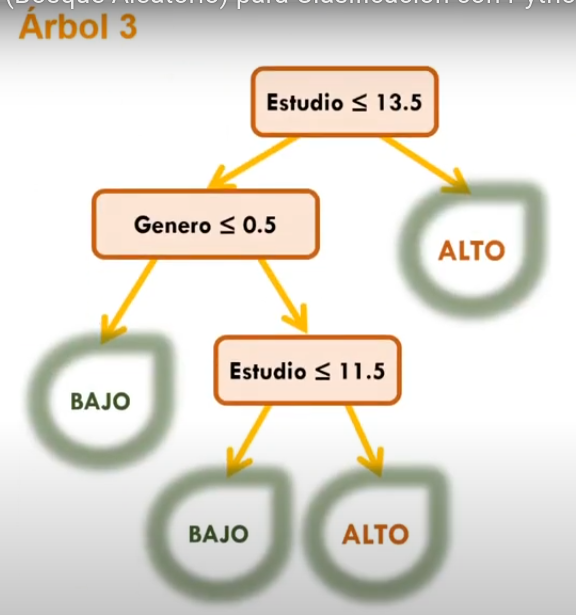

# Ahora vamos a aterrizar los conceptos

### Aleatoriedad:

#### Muestreo con reemplazo

- max_samples

In [1]:
import pandas as pd

personas = pd.read_csv("./ingresos.csv")
personas

edad  estudio  genero  tipo_trabajo  horas  ingreso
0     27        9       0             0     40        0
1     30        9       0             0     40        0
2     34        8       0             0     40        0
3     26       13       0             0     50        0
4     23        4       1             0     25        0
..   ...      ...     ...           ...    ...      ...
95    32       13       1             0     55        1
96    20       10       0             0     25        0
97    46        3       0             0     40        0
98    37        9       1             0     45        0
99    47        9       1             0     12        0

[100 rows x 6 columns]

In [3]:
# Indicamos que tanto porcentaje vamos a muestrear de nuestros datos completos
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))
print(personas.sample(frac=2/3, replace=True))

    edad  estudio  genero  tipo_trabajo  horas  ingreso
38    47        9       1             0     40        0
47    35       10       1             0     60        0
30    20        9       1             0     40        0
17    67       16       1             0     60        1
8     68        9       1             1     25        0
..   ...      ...     ...           ...    ...      ...
39    37        9       1             1     40        0
20    58        4       1             1     40        0
11    31       10       1             0     40        0
29    59       10       0             1     40        0
1     30        9       0             0     40        0

[67 rows x 6 columns]
    edad  estudio  genero  tipo_trabajo  horas  ingreso
23    70        5       0             0     40        0
86    21        9       0             0     44        0
3     26       13       0             0     50        0
77    19        5       1             0     40        0
94    37        5       1

# Aleatoriedad:

### Selección de las Características para Divisiones

- max_features = raiz de num_características

In [11]:
from random import sample

# Vamos a hacer una selección(muestreo) aleatorio de las características a considerar.
print(personas.columns[:-1], "\n")
print(sample(list(personas.columns[:-1]), 3))

Index(['edad', 'estudio', 'genero', 'tipo_trabajo', 'horas'], dtype='object') 

['estudio', 'tipo_trabajo', 'genero']


# Creación del Bosque Aleatorio

In [14]:
from sklearn.ensemble import RandomForestClassifier

bosque = RandomForestClassifier(n_estimators = 100,
                                criterion = "gini",
                                max_features = "sqrt",
                                bootstrap = True,
                                max_samples = 2/3,
                                oob_score = True)

# Pasamos los datos al bosque aleatorio
bosque.fit(personas[personas.columns[:-1]].values, personas["ingreso"].values)

# Validando que tan bueno es nuestro modelo
print(bosque.predict([[50, 16, 1, 1, 40]]))
print(bosque.score(personas[personas.columns[:-1]].values, personas["ingreso"].values))
print(bosque.oob_score_)

[1]
0.98
0.77


# Visualización del Bosque Aleatorio

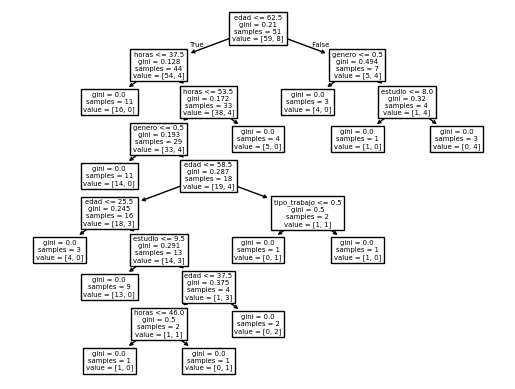

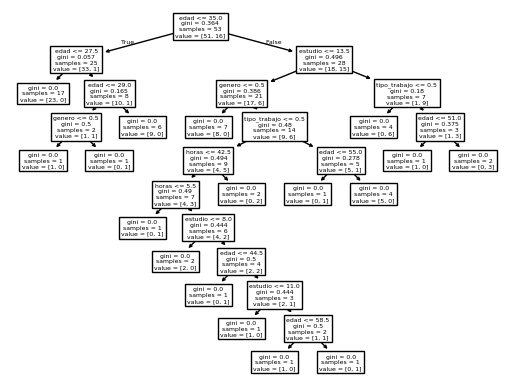

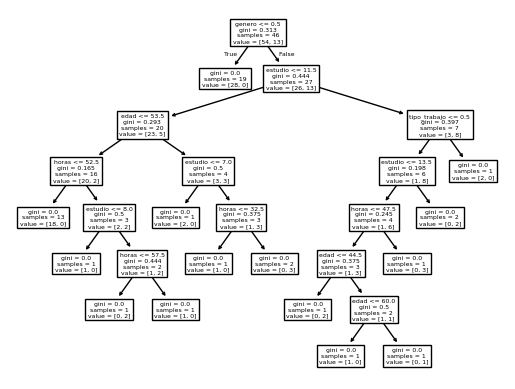

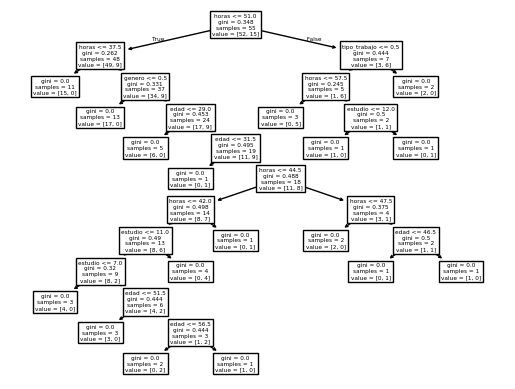

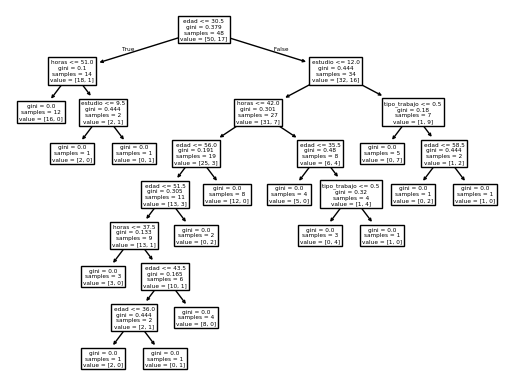

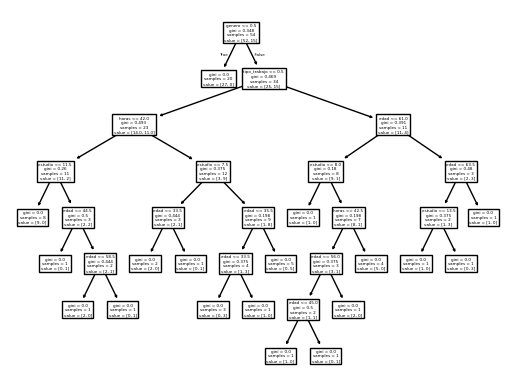

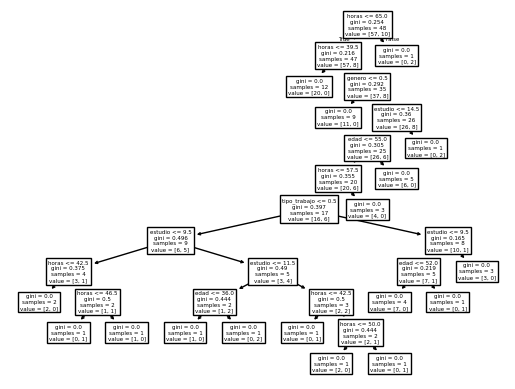

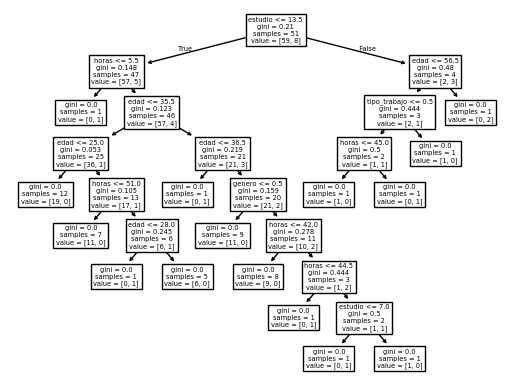

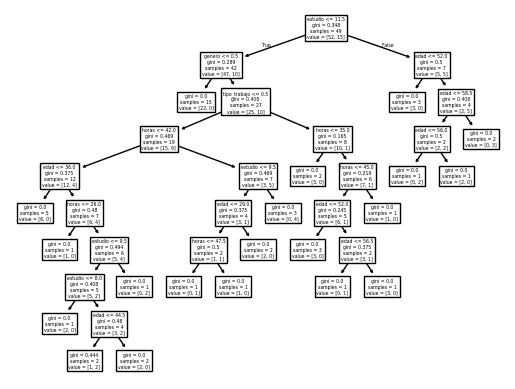

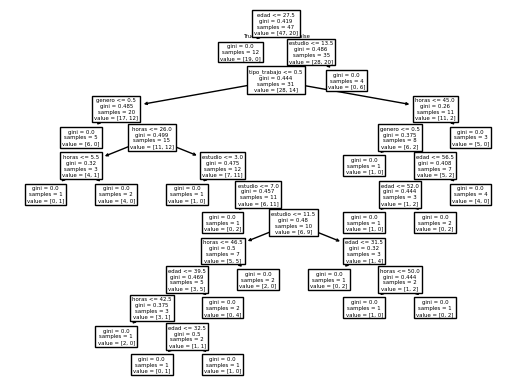

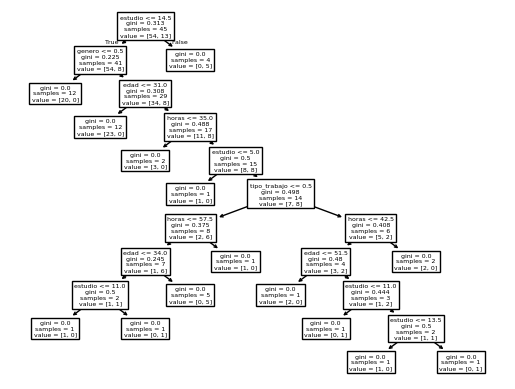

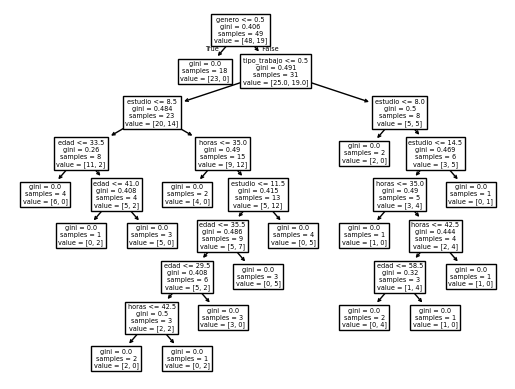

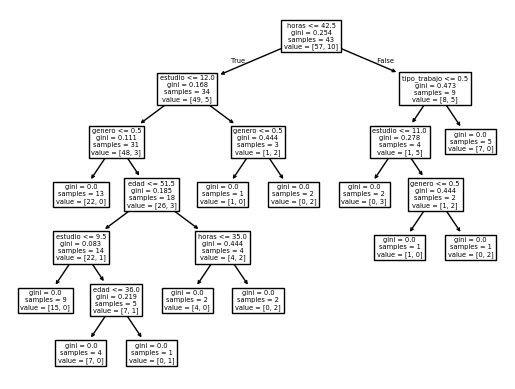

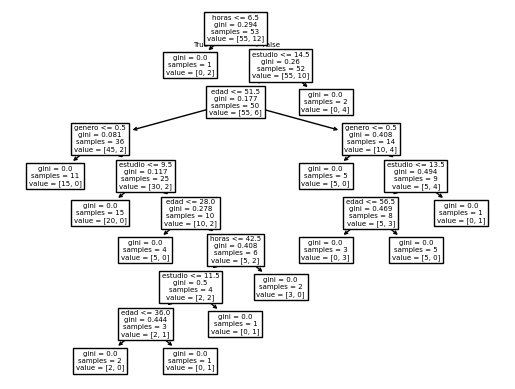

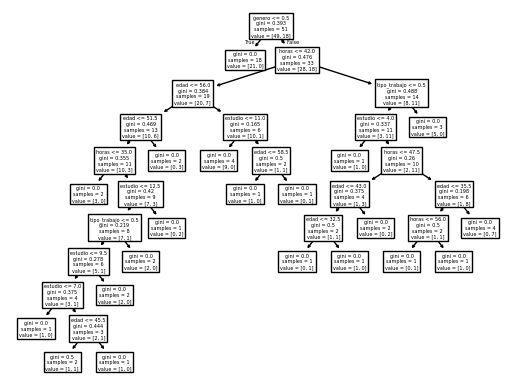

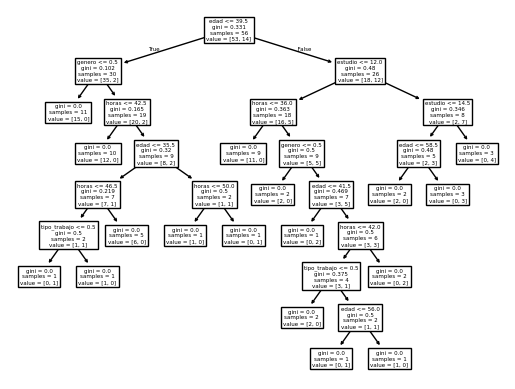

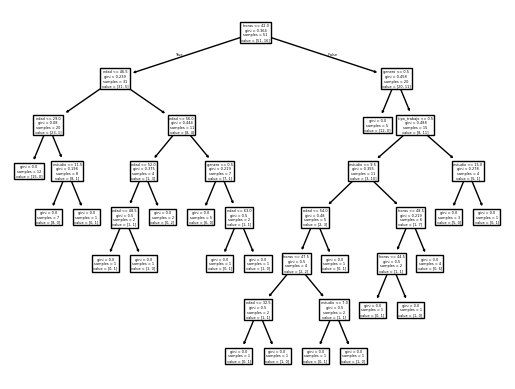

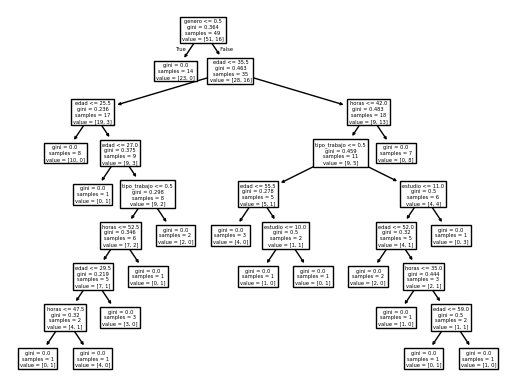

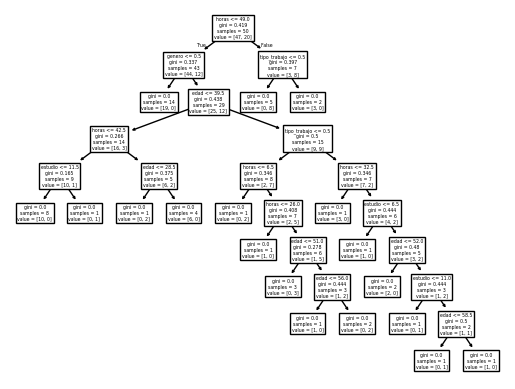

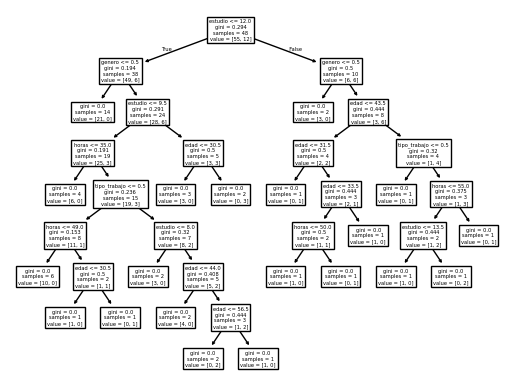

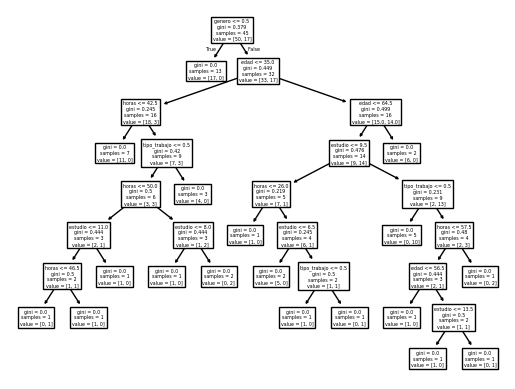

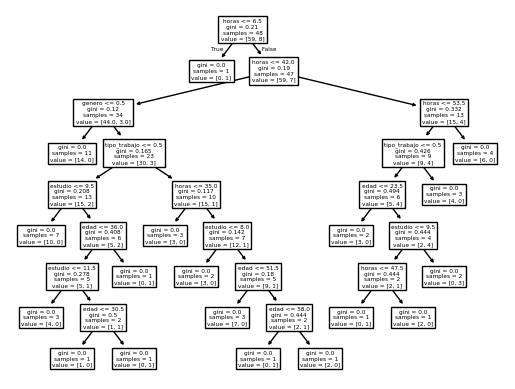

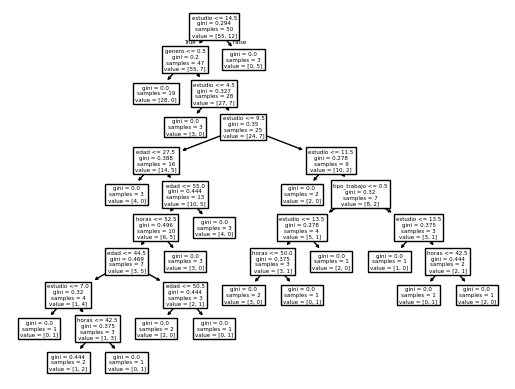

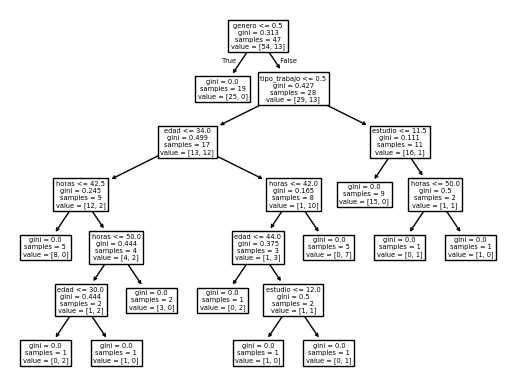

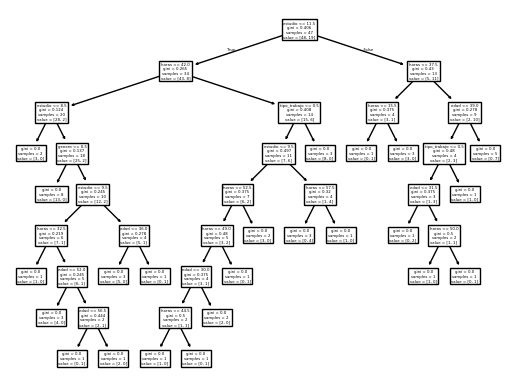

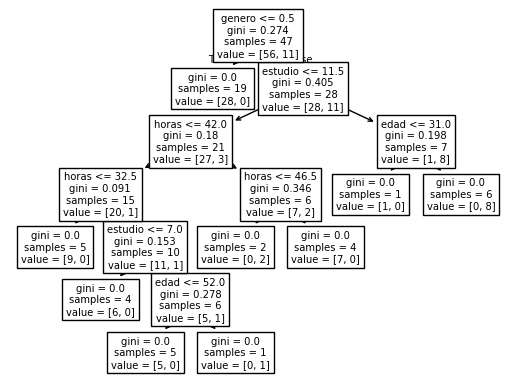

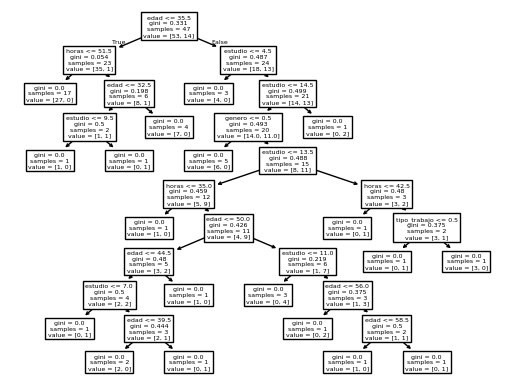

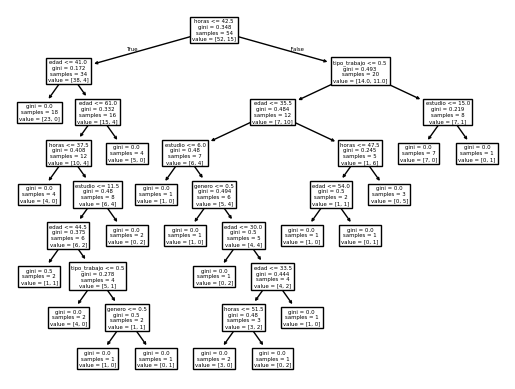

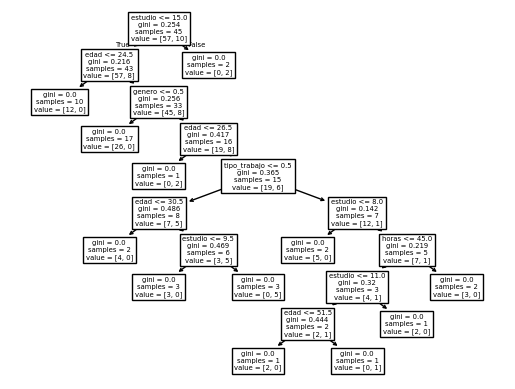

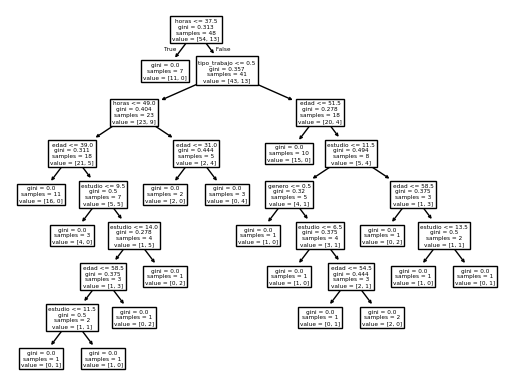

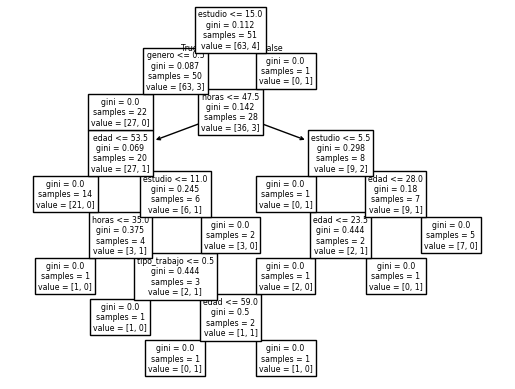

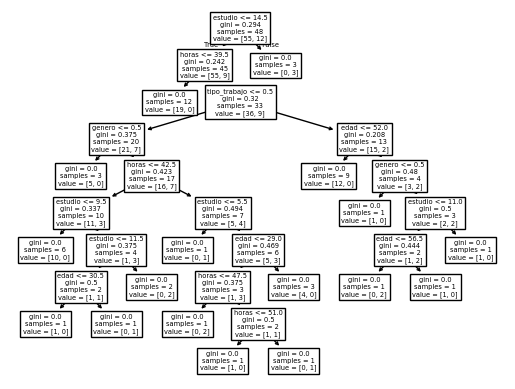

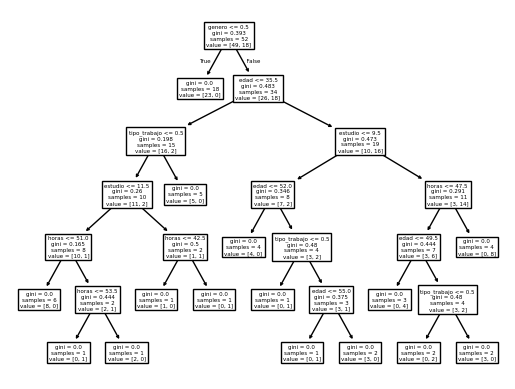

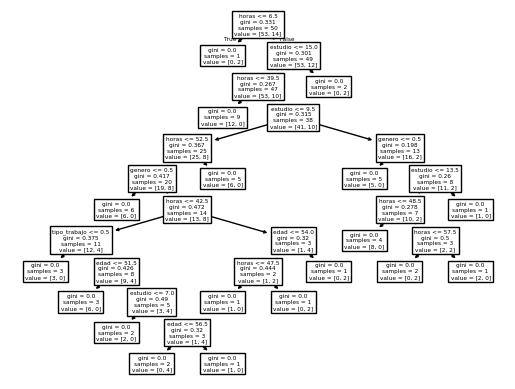

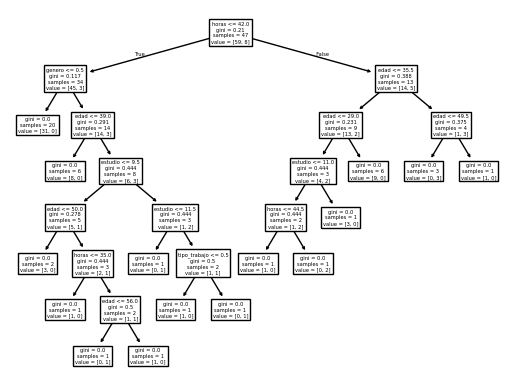

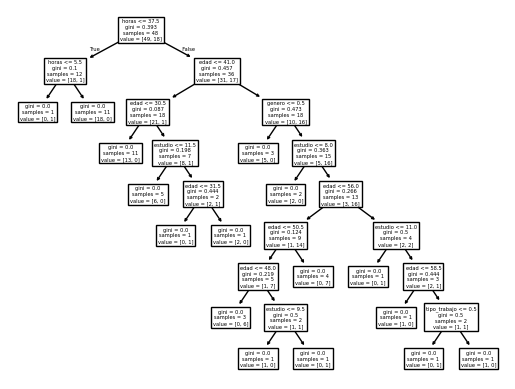

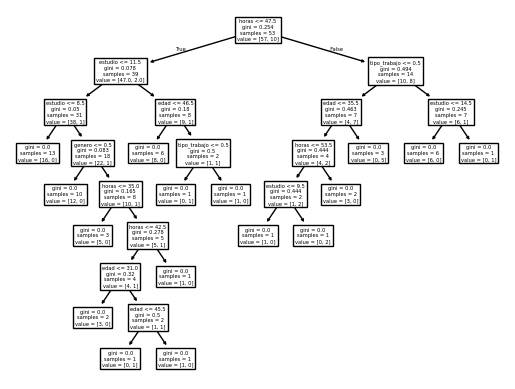

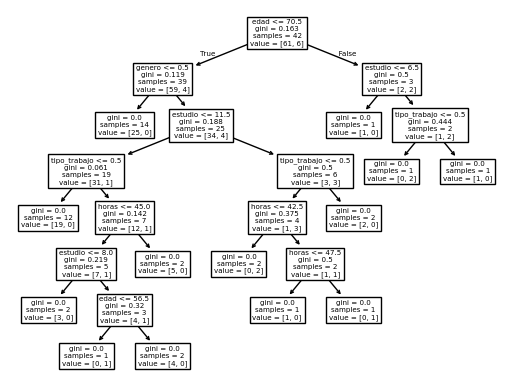

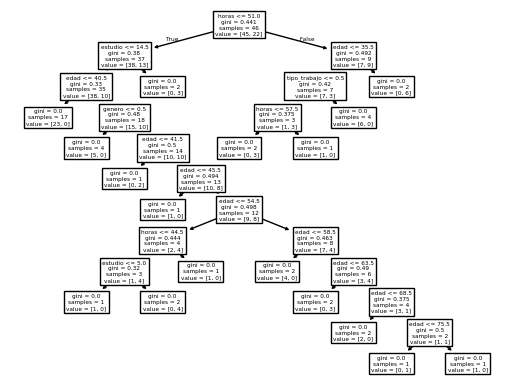

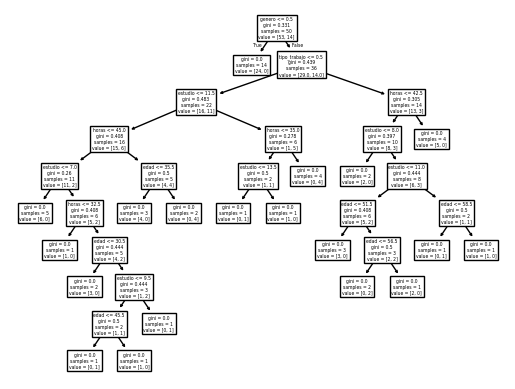

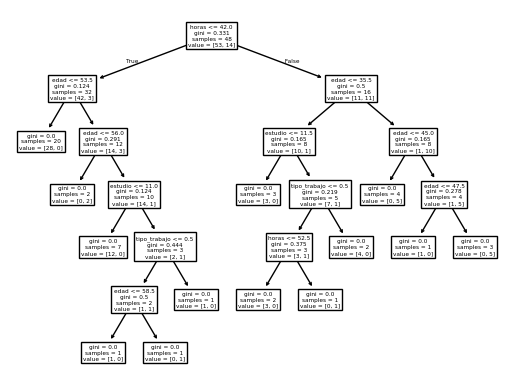

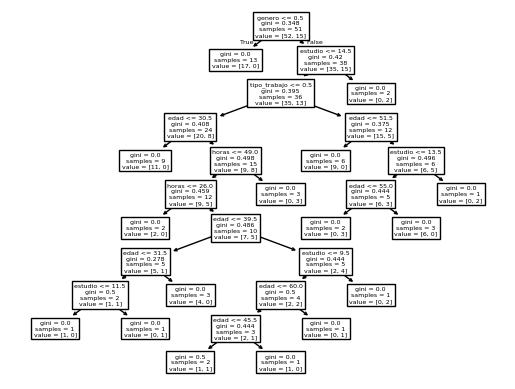

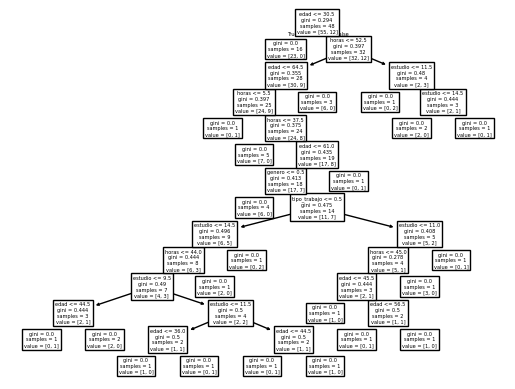

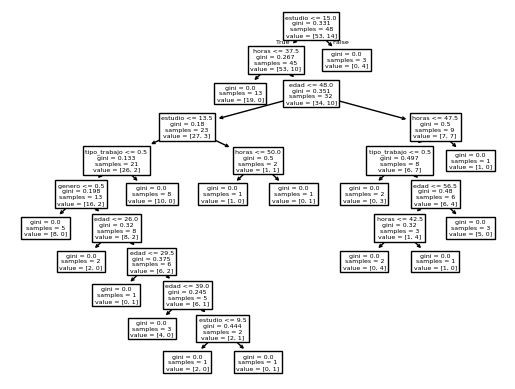

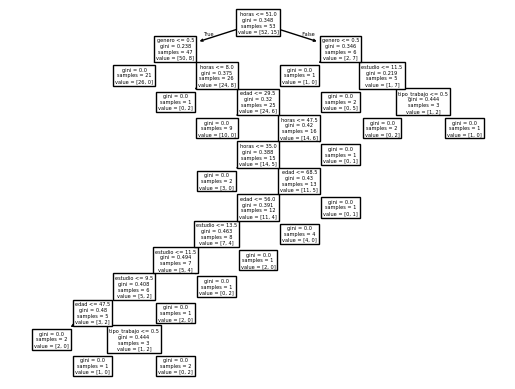

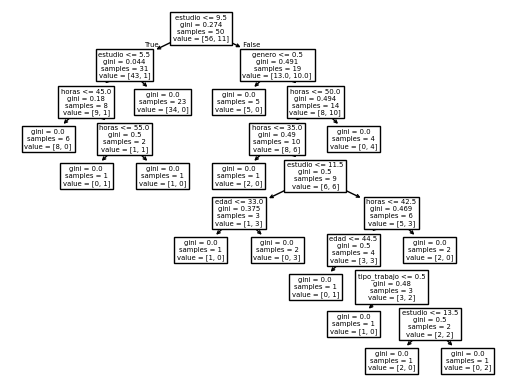

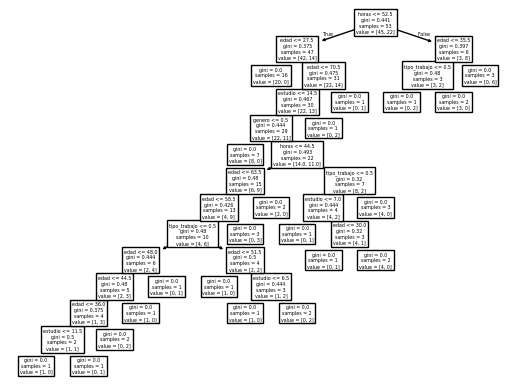

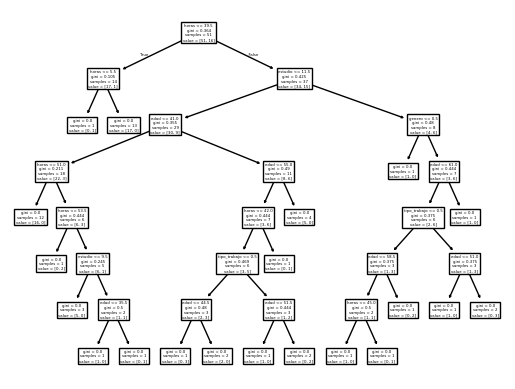

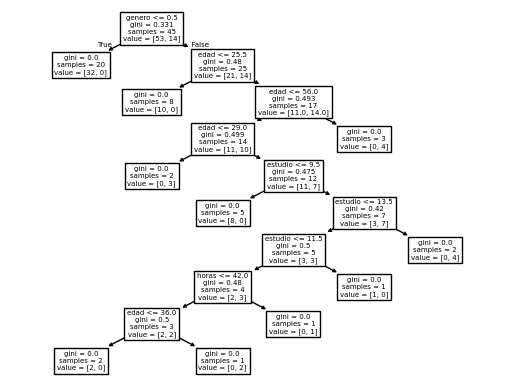

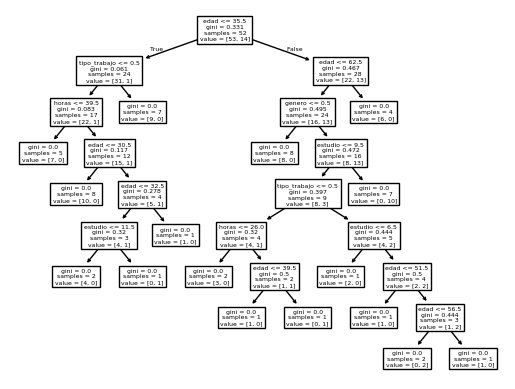

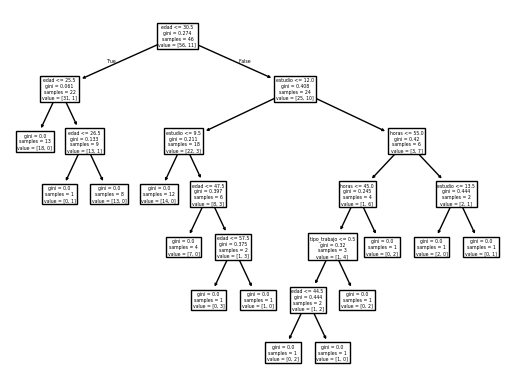

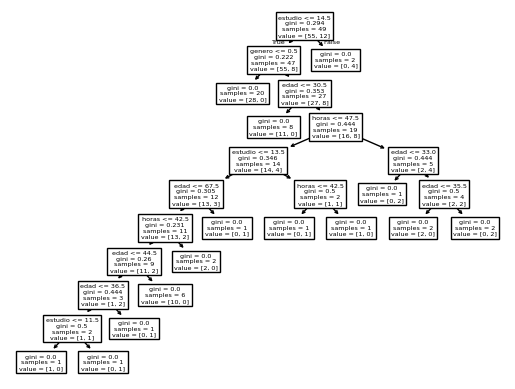

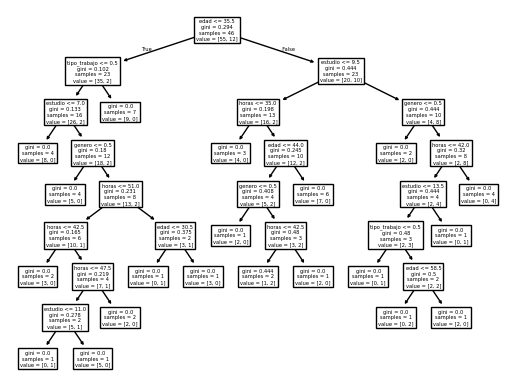

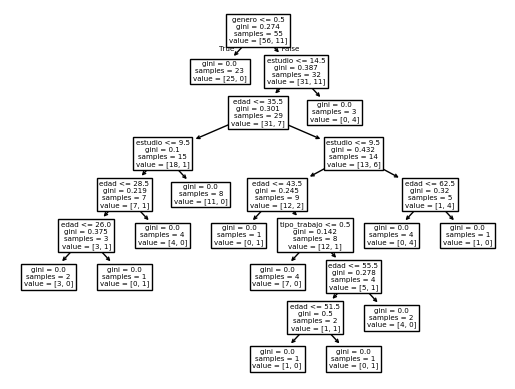

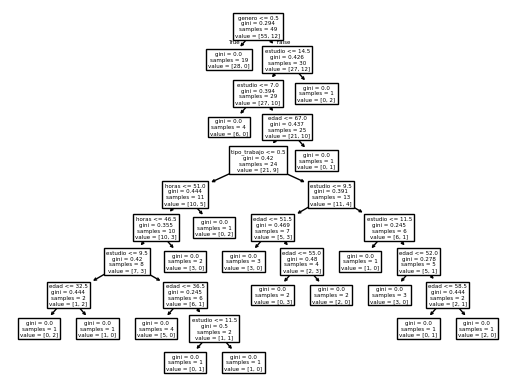

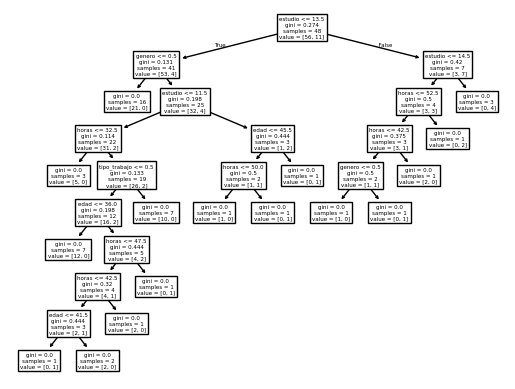

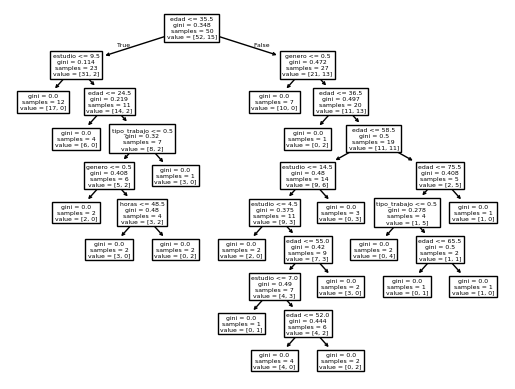

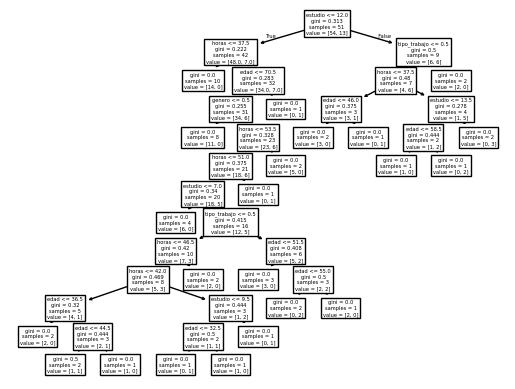

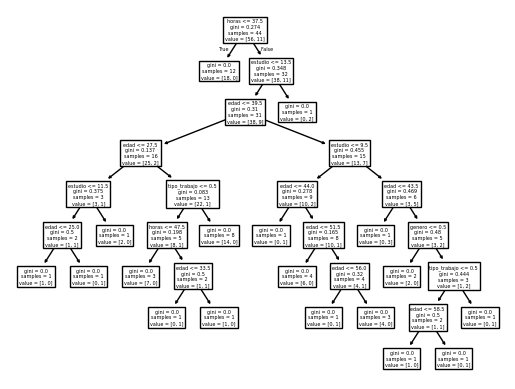

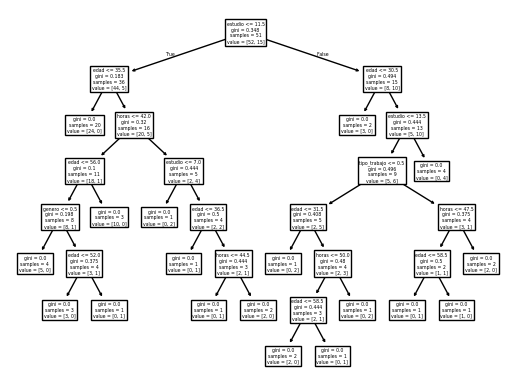

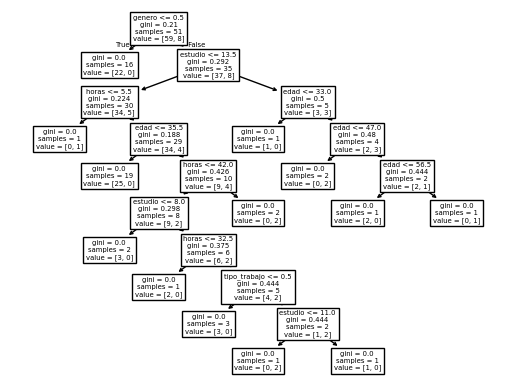

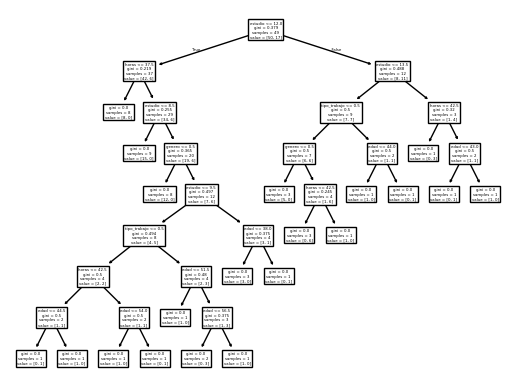

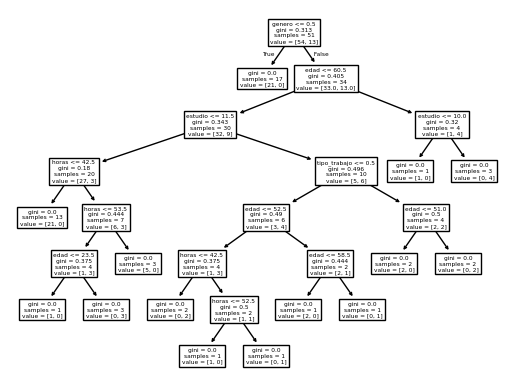

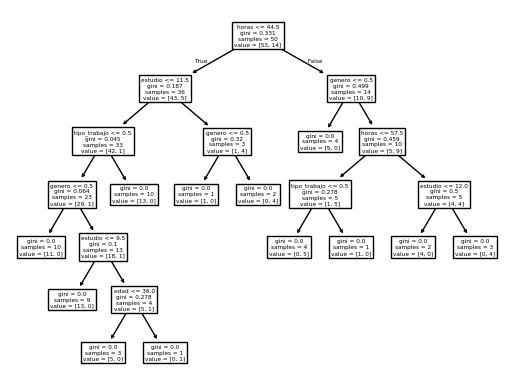

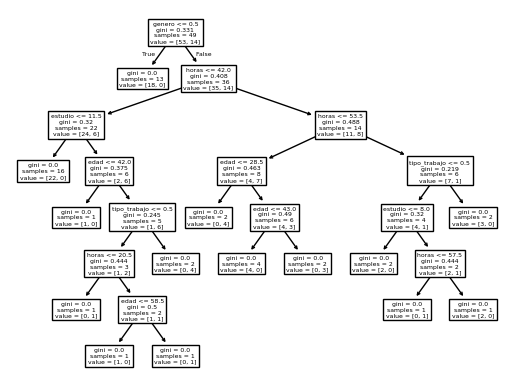

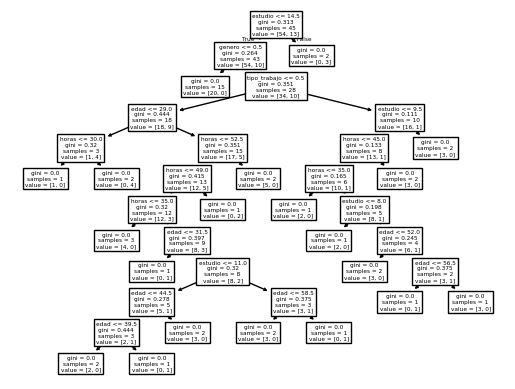

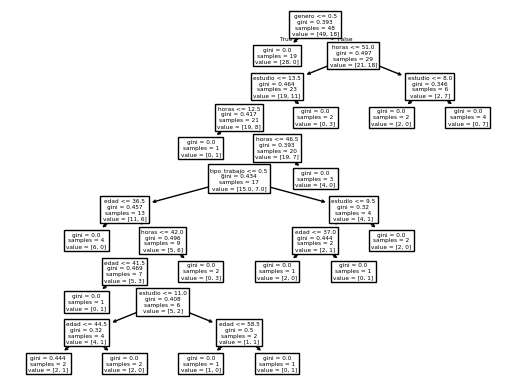

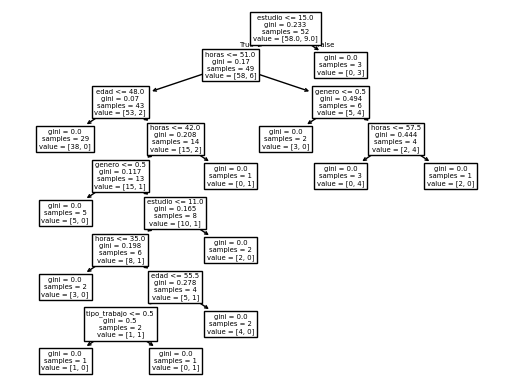

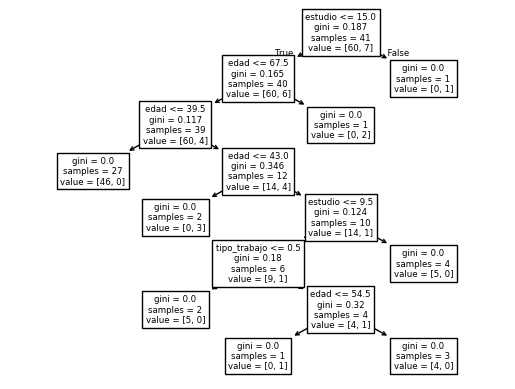

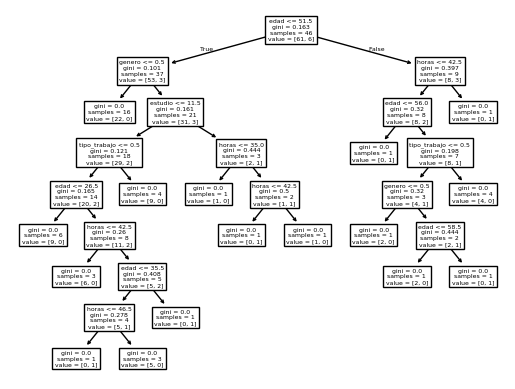

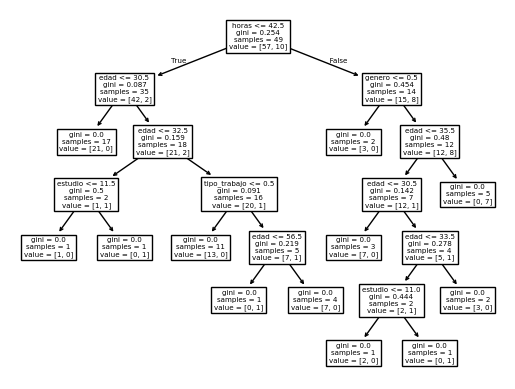

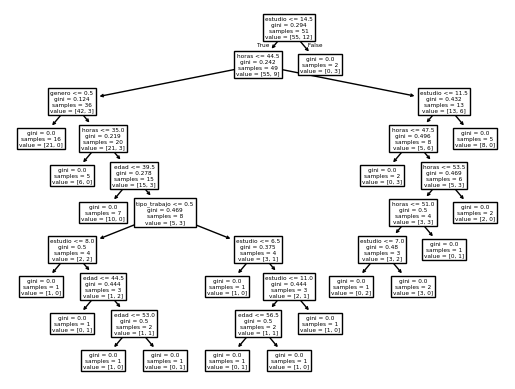

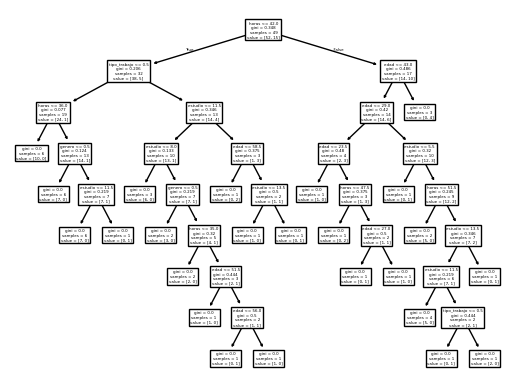

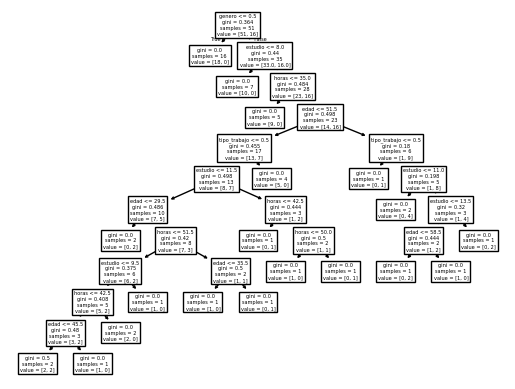

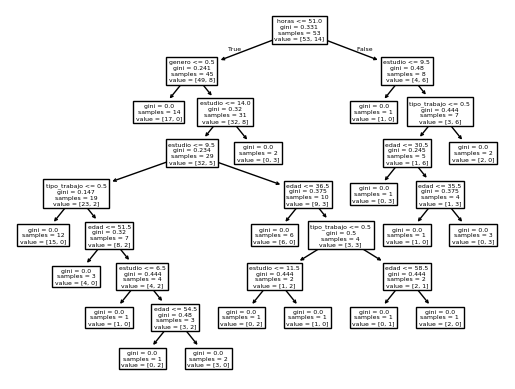

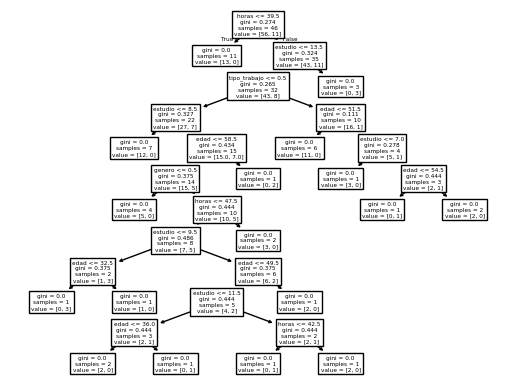

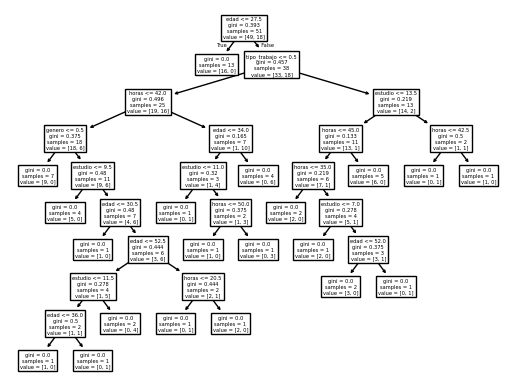

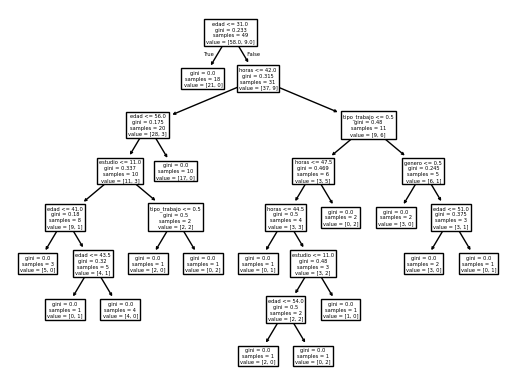

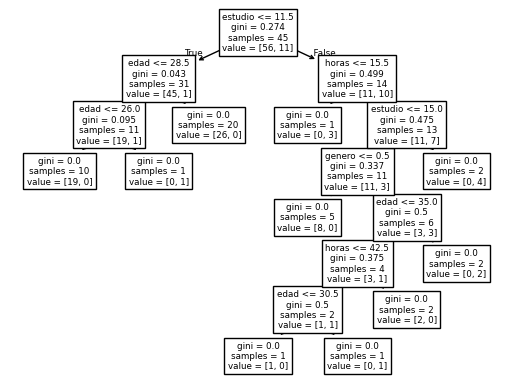

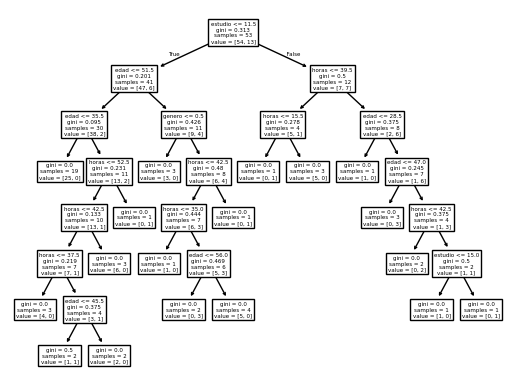

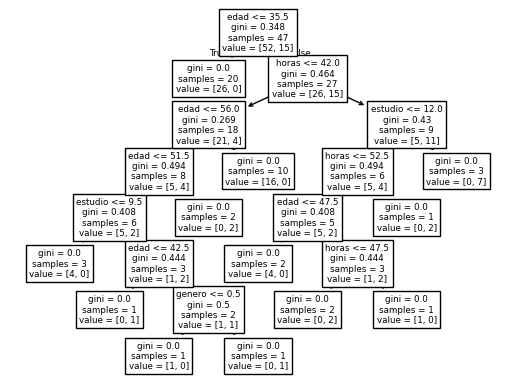

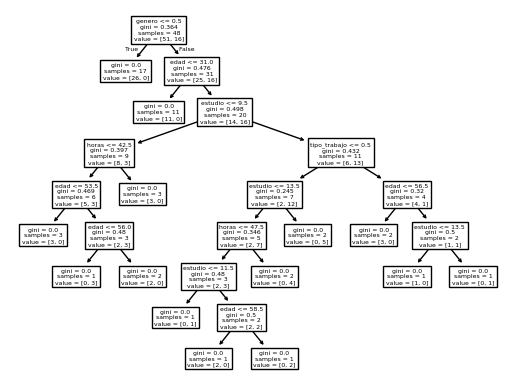

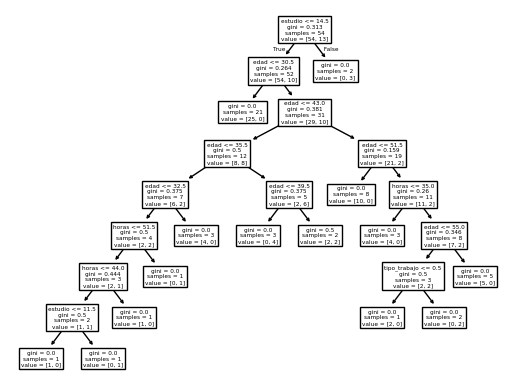

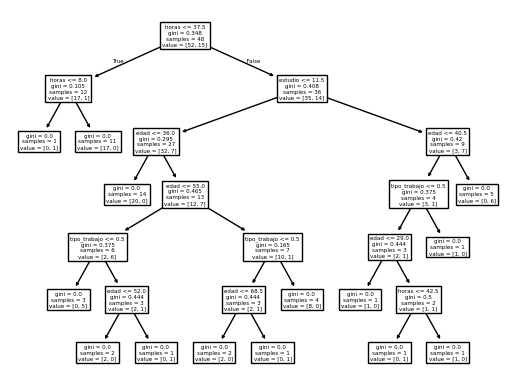

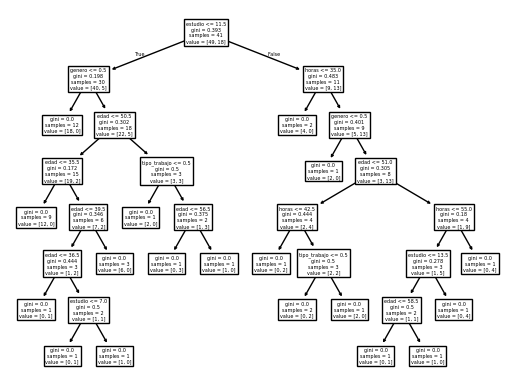

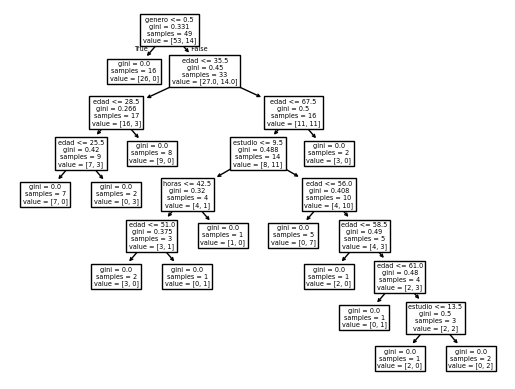

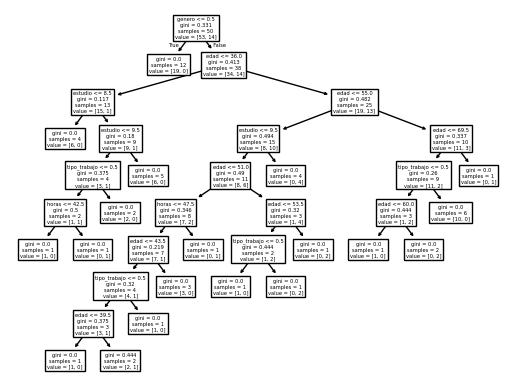

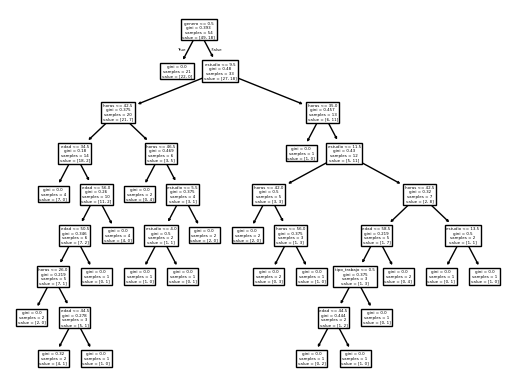

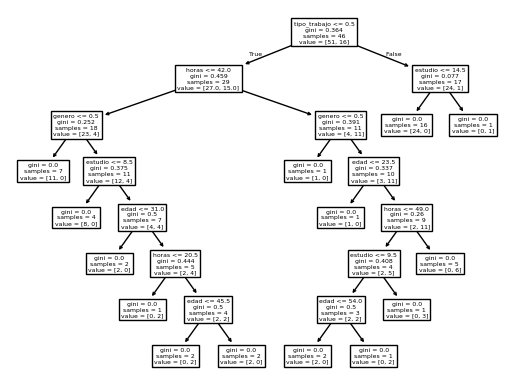

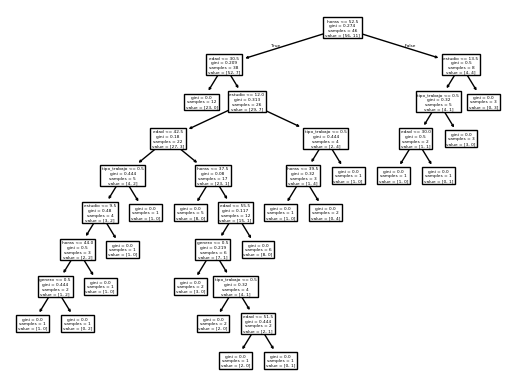

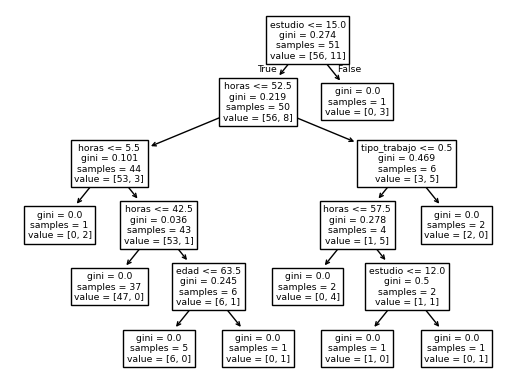

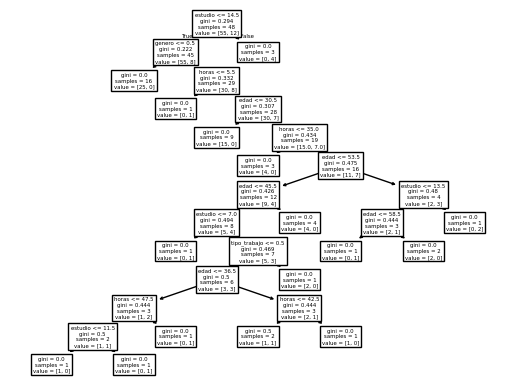

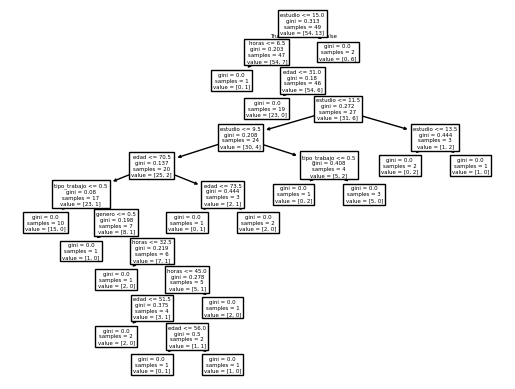

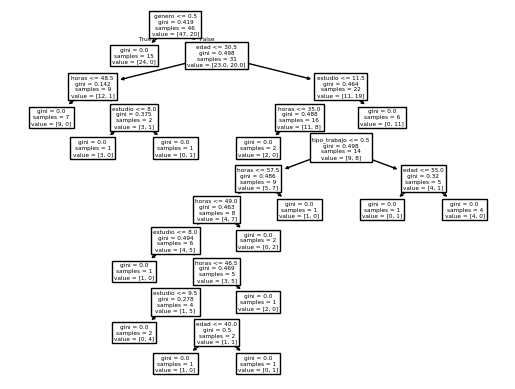

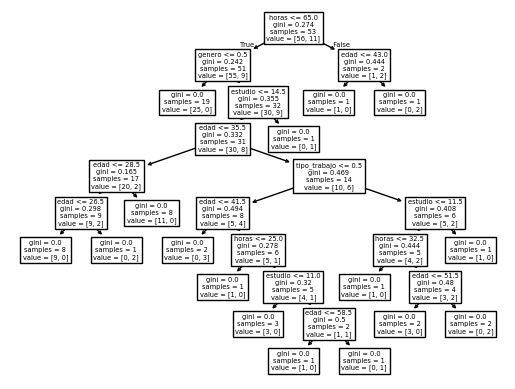

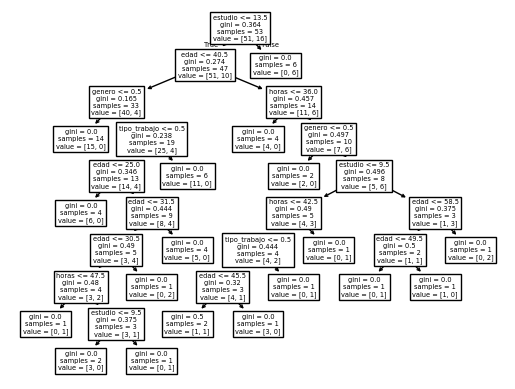

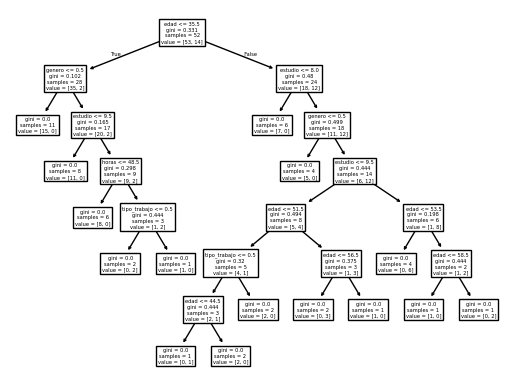

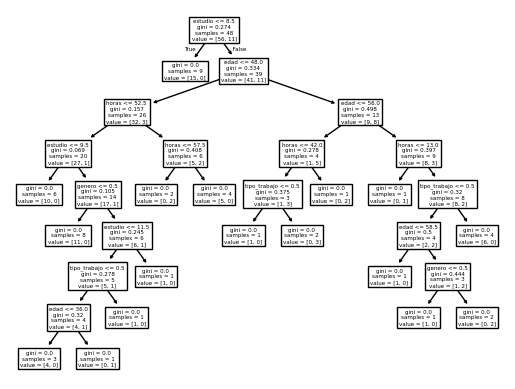

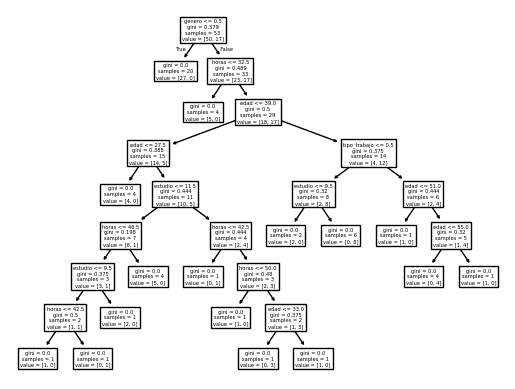

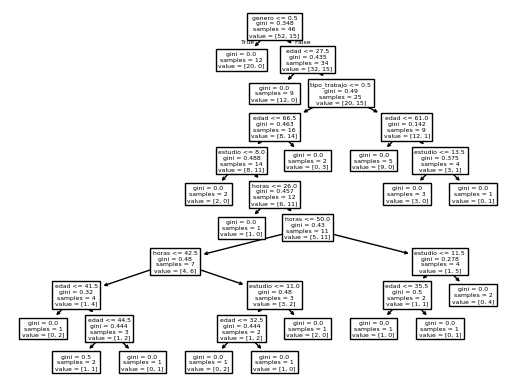

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree

for arbol in bosque.estimators_:
    tree.plot_tree(arbol, feature_names=personas.columns[:-1])
    plt.show()